In [2]:
# general
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# custom code
from detectron2.utils.visualizer import ColorMode, Visualizer
from zebrafish.configs import load_config
from zebrafish.dataset import get_meta_dataset, register_datasets, load_all_image_in_dataset
from zebrafish.evaluation import coco_evaluation, coco_evaluation_all_model
from zebrafish.model import predict
from zebrafish.visualization import plot_prediction, plot_train_vs_validation_loss, plot_segementation, plot_segementation_vs_real, plot_all_model_validation_loss
from zebrafish.utils import is_in_main_dir

#detectron
from detectron2.utils.logger import setup_logger
import cv2

setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")

assert is_in_main_dir(), "The notebook expectes you to be in the main directory"

In [8]:
model_name = "2020_06_05_17_28_10"
threshold = 0.75
path_to_model = "output/" + model_name


cfg = load_config(path_to_model)


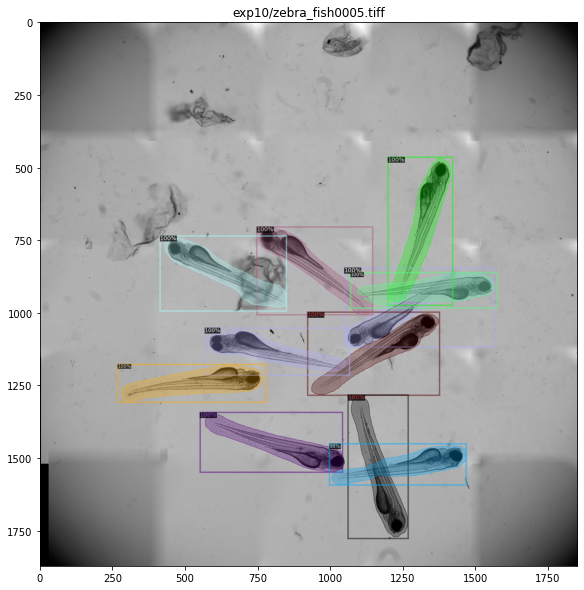

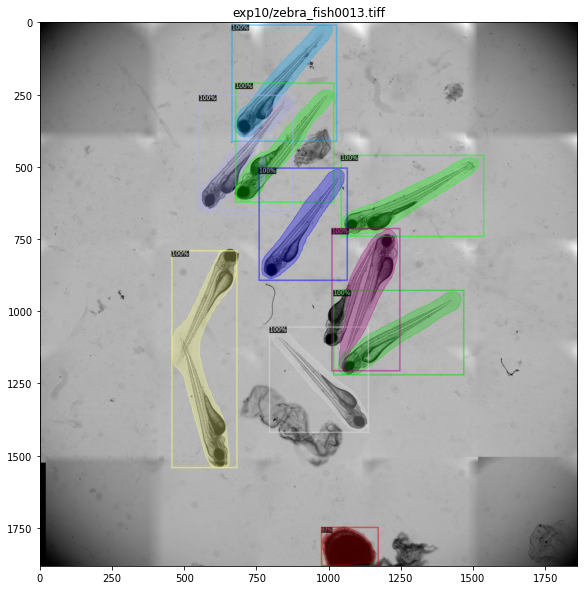

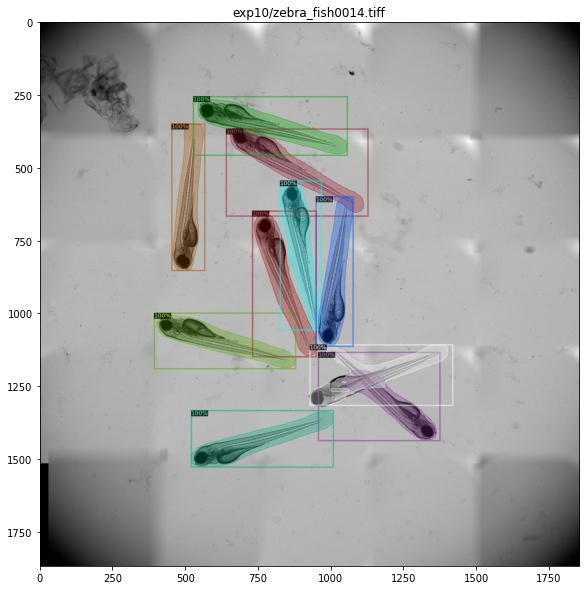

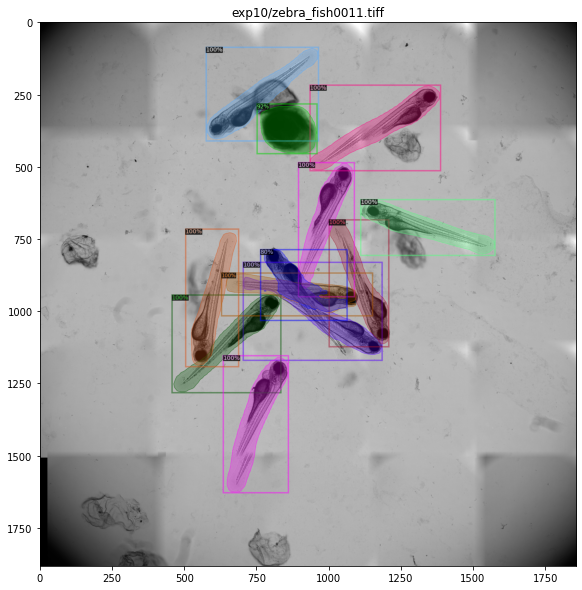

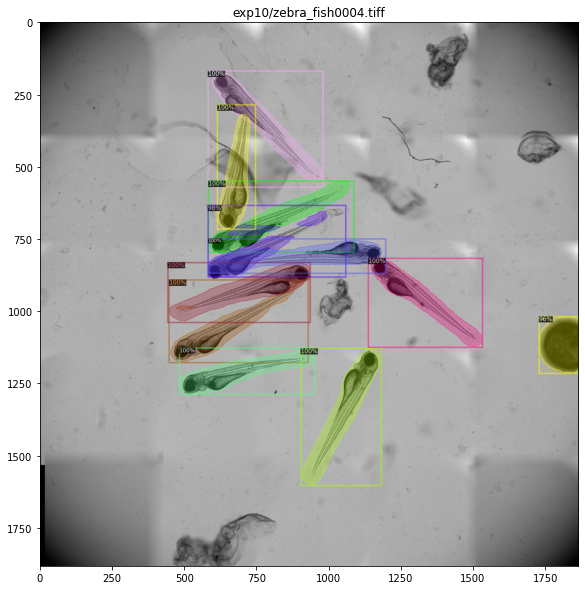

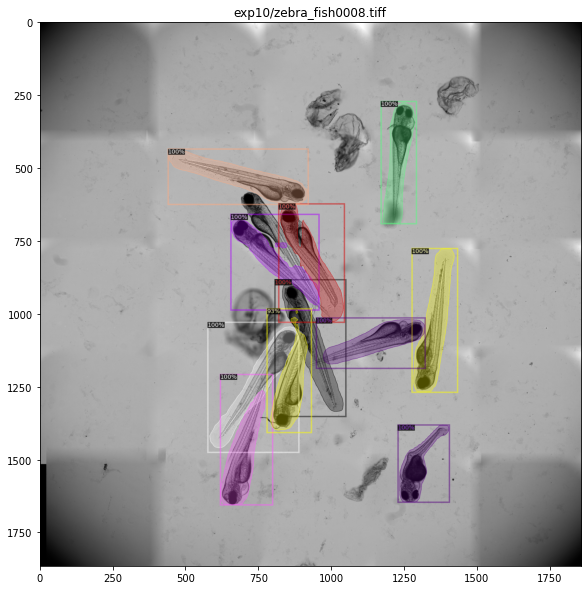

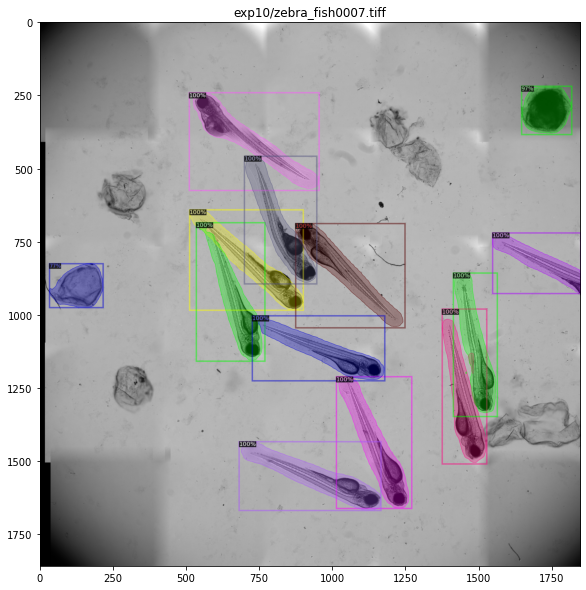

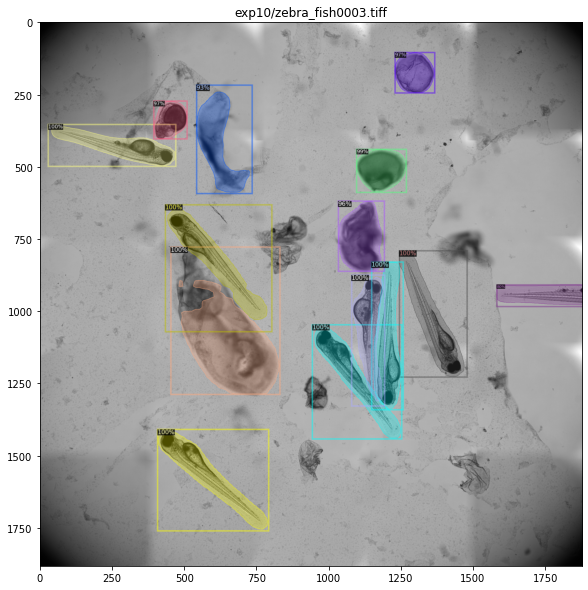

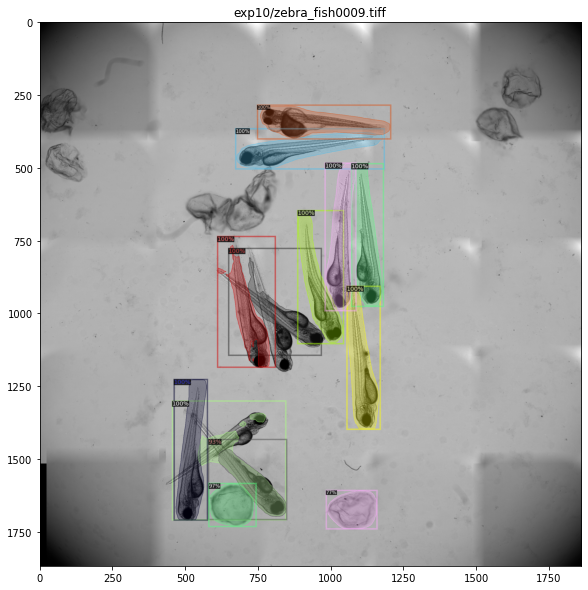

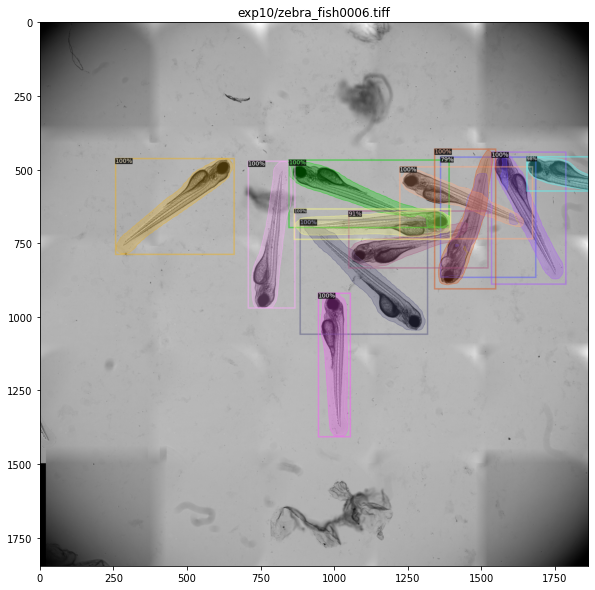

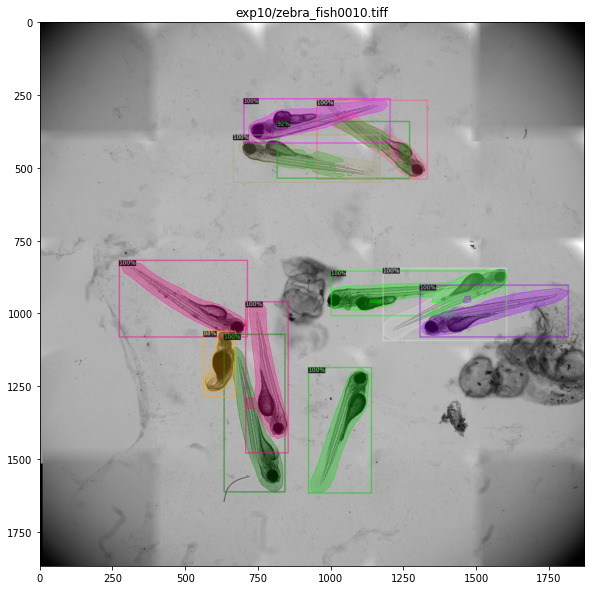

In [ ]:
for path in glob.glob("/home/jordi/Desktop/django/exp10/*.tiff"):
    dir_path = os.path.dirname(path)
    file_name = os.path.basename(path).split(".")[0]
    output_dir = os.path.join(dir_path, "prediction")
    output_path = os.path.join(output_dir, file_name + f"_prediction_model_{model_name}.jpg")

    os.makedirs(output_dir, exist_ok=True)

    image = cv2.imread(path)
    prediction = predict(cfg, [image], threshold=threshold)[0]
    plot_prediction(image, prediction, cfg, title=path.replace("/home/jordi/Desktop/django/", ""), show=False)
    plt.savefig(output_path)
    plt.show()



